In [2]:
import numpy as np
import pandas as pd
import nbimporter 
import matrix_factorization
np.random.seed(0)

Importing Jupyter notebook from matrix_factorization.ipynb


In [3]:
# Downloading Movielens-100k
!curl -O http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip
!cd ml-100k/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 4808k    0 23081    0     0  44386      0  0:01:50 --:--:--  0:01:50 44301
 23 4808k   23 1111k    0     0   716k      0  0:00:06  0:00:01  0:00:05  716k
 71 4808k   71 3447k    0     0  1436k      0  0:00:03  0:00:02  0:00:01 1436k
100 4808k  100 4808k    0     0  1739k      0  0:00:02  0:00:02 --:--:-- 1739k
"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
‘ЁбвҐ¬Ґ ­Ґ г¤ Ґвбп ­ ©вЁ гЄ § ­­л© Їгвм.


In [4]:
import zipfile
with zipfile.ZipFile('ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [5]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('./ml-100k/u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [7]:
ratings.shape

(943, 1682)

In [8]:
def get_sparsity(mat):
    print (str(n_users) + ' users')
    print (str(n_items) + ' items')
    sparsity = float(len(mat.nonzero()[0]))
    sparsity /= (mat.shape[0] * mat.shape[1])
    sparsity *= 100
    return sparsity

In [9]:
print ('Sparsity: {:4.2f}%'.format(get_sparsity(ratings)))

943 users
1682 items
Sparsity: 6.30%


In [10]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], size=10, replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [11]:
train, test = train_test_split(ratings)

In [12]:
MF_SGD = matrix_factorization.ExplicitMF(train, 40, learning='sgd', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [100]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 100
	current iteration: 10
	current iteration: 20
	current iteration: 30
	current iteration: 40
	current iteration: 50
	current iteration: 60
	current iteration: 70
	current iteration: 80
	current iteration: 90
	current iteration: 100
Train mse: 0.7504425140524171
Test mse: 0.9237273519979771


##################################################################################################################

In [13]:
train.shape

(943, 1682)

In [14]:
test.shape

(943, 1682)

In [15]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [17]:
get_sparsity(ratings)

943 users
1682 items


6.304669364224531

In [18]:
get_sparsity(train)

943 users
1682 items


5.710139043178159

In [19]:
get_sparsity(test)

943 users
1682 items


0.5945303210463734

# ####################################### GANS ###################################################

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

In [45]:
batch_size = 64

In [46]:
def make_some_noise(batch_size):
    return torch.rand(batch_size,100)

In [48]:
make_some_noise(batch_size)

tensor([[0.8720, 0.1911, 0.9251,  ..., 0.1208, 0.0174, 0.5273],
        [0.9465, 0.6521, 0.2731,  ..., 0.9966, 0.7430, 0.8943],
        [0.8856, 0.2795, 0.3332,  ..., 0.8652, 0.4523, 0.3575],
        ...,
        [0.4960, 0.8328, 0.1124,  ..., 0.0784, 0.4138, 0.9892],
        [0.8169, 0.9057, 0.1268,  ..., 0.6582, 0.5392, 0.0176],
        [0.5075, 0.7045, 0.6899,  ..., 0.3537, 0.0659, 0.0045]])

In [87]:
# defining generator class

class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.Tanh(),
                                 nn.Linear(300,1000),
                                 nn.Tanh(),
                                 nn.Linear(1000,800),
                                 nn.Tanh(),
                                 nn.Linear(800,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x*5 # to get values in range [0,5]

In [97]:
# defining discriminator class

class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.Tanh(),
                                 nn.Linear(300,300),
                                 nn.Tanh(),
                                 nn.Linear(300,200),
                                 nn.Tanh(),
                                 nn.Linear(200,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [98]:
dis = discriminator(ratings.shape[1], 1)
gen = generator(100, ratings.shape[1])

In [99]:
dis

discriminator(
  (net): Sequential(
    (0): Linear(in_features=1682, out_features=300, bias=True)
    (1): Tanh()
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): Tanh()
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): Tanh()
    (6): Linear(in_features=200, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [100]:
gen

generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): Tanh()
    (2): Linear(in_features=300, out_features=1000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): Tanh()
    (6): Linear(in_features=800, out_features=1682, bias=True)
    (7): Sigmoid()
  )
)

In [101]:
d_steps = 300
g_steps = 300

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.0001, momentum=0.9)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.0001, momentum=0.9)

# printing_steps = 200

epochs = 50

In [102]:
def get_random_batch(mat, batch_size=16):
    rand_rows = np.random.randint(mat.shape[0], size=batch_size)
#     print(mat.shape, rand_rows)
#     print(mat[rand_rows].shape)
    return mat[rand_rows]
    
get_random_batch(train)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [3., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [103]:
train = torch.autograd.Variable(torch.Tensor(train))

In [104]:
import torch.nn.functional as F
eval_losses = []
for epoch in range(10):
#     print (epoch)

    # training discriminator
    gen.train()
    dis.train()
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        real_rows = get_random_batch(train, batch_size)
        discriminator_real_outputs = dis(real_rows)
   
        dis_real_loss = criteriond1(discriminator_real_outputs, Variable(torch.ones(batch_size,1)))
    
        dis_real_loss.backward()

        # training discriminator on data produced by generator
        z_vector = make_some_noise(batch_size)
        #output from generator is generated        
        fake_rows = gen(z_vector).detach()
#         print(fake_rows[:20])
        dis_fake_out = dis(fake_rows)
        dis_fake_loss = criteriond1(dis_fake_out, Variable(torch.zeros(batch_size,1)))
        dis_fake_loss.backward()

        optimizerd1.step()
        
    # training generator
    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        z_vector = make_some_noise(batch_size)
        
        fake_rows = gen(z_vector)
#         print(fake_rows.shape, z_vector.shape)
#         print(fake_rows[:20])
        dis_out_gen_training = dis(fake_rows)
        gen_loss = criteriond2(dis_out_gen_training, Variable(torch.ones(batch_size,1)))
        gen_loss.backward()
        
        optimizerd2.step()

    # evaluation
    if epoch % 10: # todo- to change
        gen.eval()
        z_vector_eval = make_some_noise(128)
        fake_rows_eval = gen(z_vector_eval)
        real_rows_eval = get_random_batch(train, 128)
#         print(fake_rows[0][:10]) enable to see some results
        eval_loss = F.mse_loss(fake_rows_eval, real_rows_eval, reduction='sum')
        eval_losses.append(eval_loss)
        print('Epoch number {}. MSE distance between random real and fake samples {}'.format(epoch, eval_loss))
#         print('Epoch number {}. L1 distance between random real and fake samples {}'.format(epoch, torch.sum(torch.abs(fake_rows_eval - real_rows_eval))))
        

Epoch number 1. MSE distance between random real and fake samples 1296693.0
Epoch number 2. MSE distance between random real and fake samples 1280578.125
Epoch number 3. MSE distance between random real and fake samples 1255997.5
Epoch number 4. MSE distance between random real and fake samples 1224398.375
Epoch number 5. MSE distance between random real and fake samples 1126028.125
Epoch number 6. MSE distance between random real and fake samples 964662.8125
Epoch number 7. MSE distance between random real and fake samples 820860.8125
Epoch number 8. MSE distance between random real and fake samples 677063.1875
Epoch number 9. MSE distance between random real and fake samples 560401.0


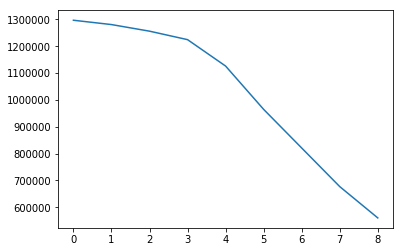

In [106]:
import matplotlib.pyplot as plt

plt.plot(eval_losses)
plt.show()

In [113]:
z_vector = make_some_noise(16)
fake_rows = gen(z_vector)

In [115]:
# as we see generator produces very similar vectors 
fake_rows[:,:9]

tensor([[4.9440, 0.7070, 0.1910, 4.3144, 1.0050, 0.3188, 4.8846, 4.4539, 4.6775],
        [4.9493, 0.6606, 0.1791, 4.3472, 0.9809, 0.2991, 4.8960, 4.4729, 4.6968],
        [4.9478, 0.6814, 0.1825, 4.3306, 0.9856, 0.3026, 4.8928, 4.4716, 4.6897],
        [4.9456, 0.6930, 0.1882, 4.3206, 1.0017, 0.3132, 4.8875, 4.4587, 4.6822],
        [4.9473, 0.6750, 0.1826, 4.3340, 0.9852, 0.3055, 4.8926, 4.4703, 4.6910],
        [4.9483, 0.6676, 0.1825, 4.3415, 0.9882, 0.3025, 4.8937, 4.4675, 4.6945],
        [4.9473, 0.6777, 0.1834, 4.3318, 0.9885, 0.3057, 4.8919, 4.4655, 4.6924],
        [4.9484, 0.6691, 0.1812, 4.3382, 0.9796, 0.3023, 4.8941, 4.4705, 4.6957],
        [4.9475, 0.6765, 0.1813, 4.3330, 0.9868, 0.3049, 4.8925, 4.4696, 4.6904],
        [4.9466, 0.6802, 0.1829, 4.3337, 0.9890, 0.3056, 4.8911, 4.4680, 4.6914],
        [4.9474, 0.6814, 0.1826, 4.3336, 0.9897, 0.3091, 4.8912, 4.4673, 4.6910],
        [4.9473, 0.6803, 0.1844, 4.3306, 0.9841, 0.3062, 4.8917, 4.4648, 4.6894],
        [4.9470,